In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.shape

(5630, 20)

In [4]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [5]:
df.isnull().sum()


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [7]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()


PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [8]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [9]:
# Filling numerical columns with the mean
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                  'OrderCount', 'DaySinceLastOrder']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Filling categorical columns with the most frequent value
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [10]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [11]:
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1373,51374,0,17.0,Mobile Phone,1,13.0,Credit Card,Female,2.000000,4,Fashion,1,Married,4,0,14.0,0.0,5.0,17.0,202.48
2106,52107,1,0.0,Phone,1,21.0,UPI,Male,2.000000,3,Laptop & Accessory,3,Married,8,0,14.0,0.0,1.0,0.0,148.34
1920,51921,0,27.0,Mobile Phone,1,25.0,Credit Card,Female,3.000000,3,Laptop & Accessory,5,Married,10,1,11.0,0.0,1.0,4.0,154.85
31,50032,0,0.0,Mobile Phone,1,13.0,Credit Card,Male,2.000000,4,Laptop & Accessory,3,Divorced,3,0,17.0,1.0,1.0,0.0,161.32
3872,53873,0,10.0,Computer,1,7.0,Credit Card,Female,3.000000,5,Laptop & Accessory,3,Married,2,0,16.0,2.0,2.0,3.0,168.74
2085,52086,0,8.0,Phone,1,16.0,UPI,Male,2.000000,3,Mobile Phone,1,Married,2,0,20.0,0.0,1.0,2.0,139.17
2009,52010,0,9.0,Mobile Phone,1,20.0,Debit Card,Male,3.000000,3,Laptop & Accessory,1,Married,1,1,17.0,2.0,4.0,11.0,165.86
2512,52513,1,0.0,Mobile Phone,3,21.0,Credit Card,Male,2.000000,5,Laptop & Accessory,1,Married,7,1,14.0,0.0,2.0,2.0,154.40
1177,51178,0,8.0,Phone,1,29.0,CC,Male,2.931535,5,Mobile,3,Married,1,0,16.0,1.0,1.0,3.0,127.05
3397,53398,0,21.0,Computer,1,23.0,Credit Card,Male,4.000000,2,Laptop & Accessory,3,Married,3,1,20.0,1.0,3.0,8.0,175.67


# Map binary values to meaningful labels

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [13]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,159.93
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,120.90
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,150.71
5626,55627,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.543491,224.91
5627,55628,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186.42
5628,55629,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,178.90


In [14]:
df['Tenure'] = df['Tenure'].round(2)
df['HourSpendOnApp'] = df['HourSpendOnApp'].round(2)
df['CashbackAmount'] = df['CashbackAmount'].round(2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [16]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [17]:
# df.describe().transpose()

In [18]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [19]:
# plt.figure(figsize=(50,10))
# sns.boxplot(data=df)
# plt.title('The boxplot to study outliers')
# plt.xlabel('Variables that predict the customer churn')
# plt.ylabel('Values')
# plt.show()

In [20]:
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lr= Q1-(1.5 * IQR)
#     ur= Q3+(1.5 * IQR)
#     return lr, ur

In [21]:
# for column in df.columns:
#     if df[column].dtype != 'object': 
#         lr,ur=remove_outlier(df[column])
#         df[column]=np.where(df[column]>ur,ur,df[column])
#         df[column]=np.where(df[column]<lr,lr,df[column])

In [22]:
# plt.figure(figsize=(50,10))
# sns.boxplot(data=df)
# plt.title('The boxplot to study outliers')
# plt.xlabel('Variables that predict the customer churn')
# plt.ylabel('Values')
# plt.show()

# 2.2.Distribution plots

In [23]:
# # Histogram: Tenure distribution by Churn
# sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, bins=30)
# plt.title("Tenure Distribution by Churn")
# plt.grid(True)
# plt.show()

In [24]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 
                                 'Gender', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)

In [25]:
df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.00,3,6.0,3.00,3,2,9,1,11.0,...,False,False,False,False,True,False,False,False,False,True
1,1,10.19,1,8.0,3.00,4,3,7,1,15.0,...,False,True,True,False,False,True,False,False,False,True
2,1,10.19,1,30.0,2.00,4,3,6,1,14.0,...,False,False,True,False,False,True,False,False,False,True
3,1,0.00,3,15.0,2.00,4,5,8,0,23.0,...,False,False,True,False,True,False,False,False,False,True
4,1,0.00,1,12.0,2.93,3,5,3,0,11.0,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.00,1,30.0,3.00,2,1,6,0,18.0,...,False,False,True,False,True,False,False,False,True,False
5626,0,13.00,1,13.0,3.00,5,5,6,0,16.0,...,False,False,True,False,False,False,False,False,True,False
5627,0,1.00,1,11.0,3.00,2,4,3,1,21.0,...,False,False,True,False,True,False,False,False,True,False
5628,0,23.00,3,9.0,4.00,5,4,4,0,15.0,...,False,False,True,False,True,False,False,False,True,False


In [26]:
# Drop the TenureGroup column
df = df.drop(columns=['TenureGroup'], errors='ignore')

# Verify if the column is dropped
print("Columns after dropping TenureGroup:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   CityTier                               5630 non-null   int64  
 3   WarehouseToHome                        5630 non-null   float64
 4   HourSpendOnApp                         5630 non-null   float64
 5   NumberOfDeviceRegistered               5630 non-null   int64  
 6   SatisfactionScore                      5630 non-null   int64  
 7   NumberOfAddress                        5630 non-null   int64  
 8   Complain                               5630 non-null   int64  
 9   OrderAmountHikeFromlastYear            5630 non-null   float64
 10  CouponUsed                             5630 non-null   float64
 11  Orde

In [27]:
# Initialize scaler
scaler = StandardScaler()
y = df['Churn']
# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [28]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [29]:
df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,-0.741002,3,-1.156091,0.097168,3,2,9,1,-1.312273,...,False,False,False,False,True,False,False,False,False,True
1,1,0.000011,1,-0.916235,0.097168,4,3,7,1,-0.197324,...,False,True,True,False,False,True,False,False,False,True
2,1,0.000011,1,1.722175,-1.320625,4,3,6,1,-0.476062,...,False,False,True,False,False,True,False,False,False,True
3,1,-1.219848,3,-0.076741,-1.320625,4,5,8,0,2.032574,...,False,False,True,False,True,False,False,False,False,True
4,1,-1.219848,1,-0.436525,-0.002078,3,5,3,0,-1.312273,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,-0.022734,1,1.722175,0.097168,2,1,6,0,0.638888,...,False,False,True,False,True,False,False,False,True,False
5626,0,0.336401,1,-0.316597,0.097168,5,5,6,0,0.081413,...,False,False,True,False,False,False,False,False,True,False
5627,0,-1.100136,1,-0.556452,0.097168,2,4,3,1,1.475100,...,False,False,True,False,True,False,False,False,True,False
5628,0,1.533515,3,-0.796308,1.514961,5,4,4,0,-0.197324,...,False,False,True,False,True,False,False,False,True,False


In [30]:
# Split Data
X = df.drop(columns=[ 'Churn'])  # Exclude irrelevant columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:

X_train

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
1425,-0.860714,1,-1.156091,-1.320625,4,1,2,1,-1.033536,-0.405767,...,False,False,True,False,True,False,False,False,True,False
4603,-1.100136,1,-0.556452,1.514961,5,3,7,0,0.360150,-0.405767,...,False,False,True,False,False,False,True,False,False,True
5575,-0.381868,1,-0.916235,0.097168,5,3,3,0,-0.754799,-0.405767,...,False,False,True,False,False,False,True,False,True,False
1550,-1.219848,3,2.081958,-1.320625,3,1,2,0,1.753837,-0.946053,...,True,False,False,False,False,False,False,False,True,False
1983,-1.219848,3,-0.676380,-1.320625,4,5,2,0,-1.033536,-0.405767,...,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.100136,1,1.362392,1.514961,4,3,2,0,-0.197324,0.134518,...,False,False,True,False,True,False,False,False,False,True
5191,-0.022734,3,0.043186,0.097168,4,1,6,0,-1.033536,1.755375,...,True,False,True,False,False,False,False,False,True,False
5226,-0.381868,1,-0.556452,0.097168,5,4,10,0,-1.033536,0.134518,...,False,False,False,False,False,False,True,False,True,False
5390,-1.100136,1,2.441741,1.514961,4,5,3,0,-0.476062,0.134518,...,False,False,True,False,False,False,True,False,True,False


In [32]:
y_train

1425    0
4603    1
5575    0
1550    1
1983    0
       ..
3772    0
5191    1
5226    0
5390    0
860     1
Name: Churn, Length: 4222, dtype: int64

In [33]:
lr = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

In [34]:
lr.fit(X_train, y_train)

/Users/tusharkungar/ClassRoom/Project/CCP_ML/churn_env/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/tusharkungar/ClassRoom/Project/CCP_ML/churn_env/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` p

In [35]:
y_pred = lr.predict(X_test)

In [36]:
print("Train Accuracy Score:", accuracy_score(y_train, lr.predict(X_train)))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))

Train Accuracy Score: 0.8905731880625296
Test Accuracy Score: 0.9090909090909091


In [37]:
lr.coef_
lr.intercept_

array([-3.69914165])

In [38]:
confusion_matrix(y_test, y_pred) 


array([[1151,   21],
       [ 107,  129]])

In [39]:
y_prob = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred)) 
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1172
           1       0.86      0.55      0.67       236

    accuracy                           0.91      1408
   macro avg       0.89      0.76      0.81      1408
weighted avg       0.91      0.91      0.90      1408

ROC-AUC: 0.8872960895470585


In [40]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)

In [41]:
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [42]:
dt_pred = dt.predict(X_test)

In [43]:
print("Decision Tree Accuracy Score:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy Score: 0.8920454545454546


In [44]:
y_prob = dt.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred)) 
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1172
           1       0.86      0.55      0.67       236

    accuracy                           0.91      1408
   macro avg       0.89      0.76      0.81      1408
weighted avg       0.91      0.91      0.90      1408

ROC-AUC: 0.8724945045409845


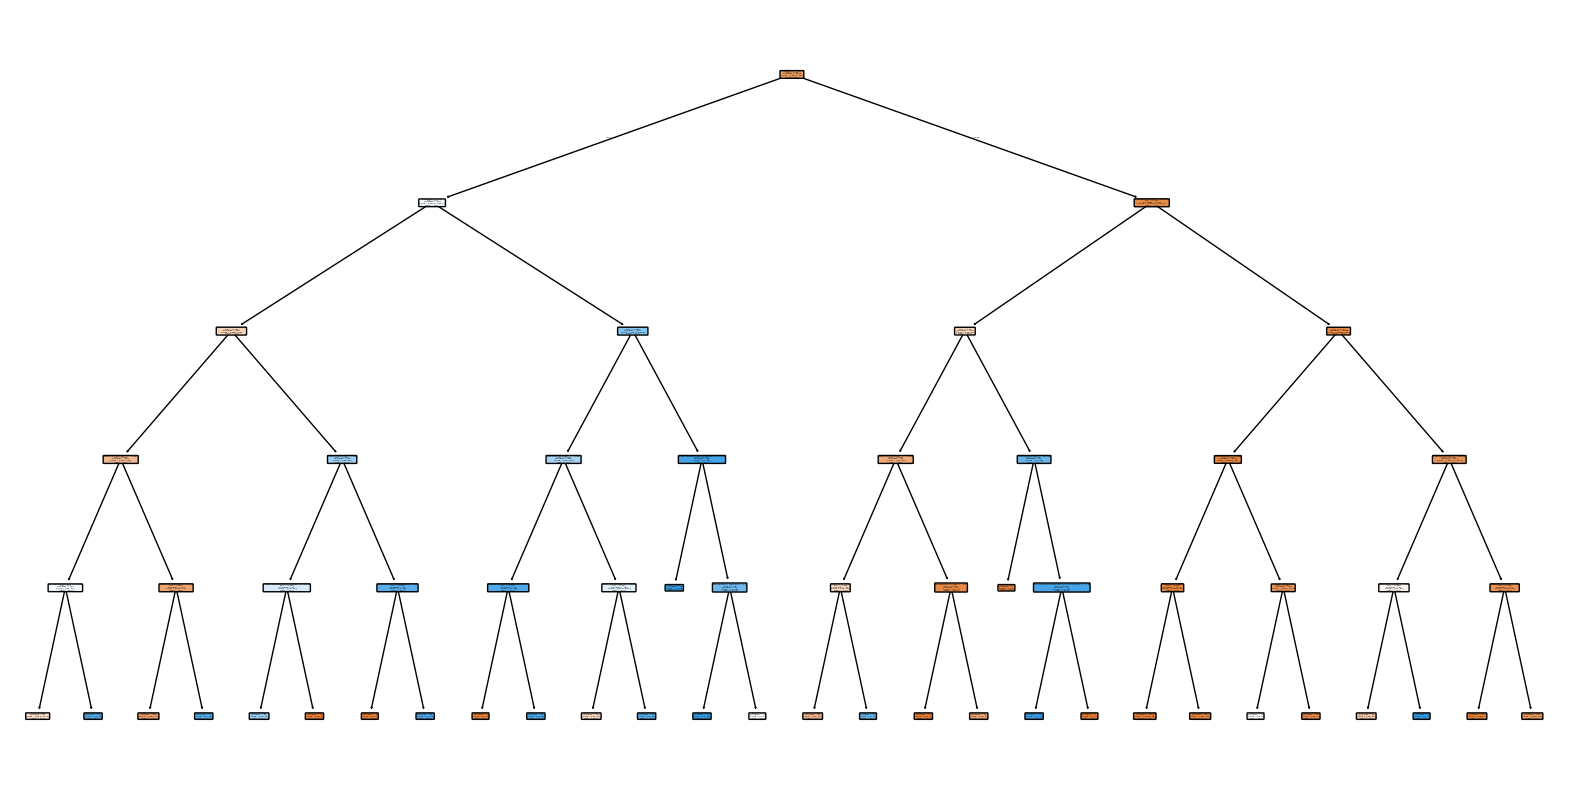

In [45]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=True,
    filled=True,
    rounded=True
)
plt.show()

In [46]:
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9019422074846044
Test Accuracy: 0.8920454545454546


In [47]:

print("Leaves:", dt.get_n_leaves())


Leaves: 30


In [48]:
rf = RandomForestClassifier(n_estimators=500, max_depth=15, max_features='log2', bootstrap=False, random_state=42, class_weight='balanced')

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Training Accuracy Score:", accuracy_score(y_train, rf.predict(X_train)))
print("Random Forest Testing Accuracy Score:", accuracy_score(y_test, rf_pred))

Random Forest Training Accuracy Score: 1.0
Random Forest Testing Accuracy Score: 0.9701704545454546


In [49]:
X_train

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
1425,-0.860714,1,-1.156091,-1.320625,4,1,2,1,-1.033536,-0.405767,...,False,False,True,False,True,False,False,False,True,False
4603,-1.100136,1,-0.556452,1.514961,5,3,7,0,0.360150,-0.405767,...,False,False,True,False,False,False,True,False,False,True
5575,-0.381868,1,-0.916235,0.097168,5,3,3,0,-0.754799,-0.405767,...,False,False,True,False,False,False,True,False,True,False
1550,-1.219848,3,2.081958,-1.320625,3,1,2,0,1.753837,-0.946053,...,True,False,False,False,False,False,False,False,True,False
1983,-1.219848,3,-0.676380,-1.320625,4,5,2,0,-1.033536,-0.405767,...,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.100136,1,1.362392,1.514961,4,3,2,0,-0.197324,0.134518,...,False,False,True,False,True,False,False,False,False,True
5191,-0.022734,3,0.043186,0.097168,4,1,6,0,-1.033536,1.755375,...,True,False,True,False,False,False,False,False,True,False
5226,-0.381868,1,-0.556452,0.097168,5,4,10,0,-1.033536,0.134518,...,False,False,False,False,False,False,True,False,True,False
5390,-1.100136,1,2.441741,1.514961,4,5,3,0,-0.476062,0.134518,...,False,False,True,False,False,False,True,False,True,False


In [50]:
single_row = np.array([
    -0.8607136066703293, -1.1560909729964841, -1.3206247727078884,
    4, 1, 2, 1, -1.0335361220262353, -0.40576709278560585,
    -0.002787783747593118, -1.2787521017096906, 151.26,
    True, False, False, False, False, True, False, False,
    True, False, True, False, False, False, True, False
]).reshape(1, -1)

print("Single Row Prediction (Random Forest):", rf.predict(single_row))

/Users/tusharkungar/ClassRoom/Project/CCP_ML/churn_env/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 28 features, but RandomForestClassifier is expecting 29 features as input.

In [53]:
y_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred)) 
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1172
           1       0.86      0.55      0.67       236

    accuracy                           0.91      1408
   macro avg       0.89      0.76      0.81      1408
weighted avg       0.91      0.91      0.90      1408

ROC-AUC: 0.9875086770405508


In [54]:
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 8, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "class_weight": [None, "balanced", "balanced_subsample"]
}


In [55]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                # good balance of speed & quality
    scoring="roc_auc",        # BEST for imbalanced classification
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python3.14/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python3.14/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python3.14/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. Se

[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END boot

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'class_weight': [None, 'balanced', ...], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",30
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be

In [56]:

best_rf = random_search.best_estimator_
print("Best parameters:")
print(random_search.best_params_)
print("Best CV ROC-AUC:", random_search.best_score_)


Best parameters:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'class_weight': 'balanced_subsample', 'bootstrap': False}
Best CV ROC-AUC: 0.983682296195839


In [ ]:

y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1414
           1       0.94      0.83      0.88       275

    accuracy                           0.96      1689
   macro avg       0.95      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689

Test ROC-AUC: 0.9830911662594831


# Preparing Final Model

In [57]:
numerical_features = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder",
    "CashbackAmount"
]

integer_features = [
    "CityTier",
    "NumberOfDeviceRegistered",
    "SatisfactionScore",
    "NumberOfAddress",
    "Complain"
]

boolean_features = [
    "PreferredLoginDevice_Mobile Phone",
    "PreferredLoginDevice_Phone",
    "PreferredPaymentMode_COD",
    "PreferredPaymentMode_Cash on Delivery",
    "PreferredPaymentMode_Credit Card",
    "PreferredPaymentMode_Debit Card",
    "PreferredPaymentMode_E wallet",
    "PreferredPaymentMode_UPI",
    "Gender_Male",
    "PreferedOrderCat_Grocery",
    "PreferedOrderCat_Laptop & Accessory",
    "PreferedOrderCat_Mobile",
    "PreferedOrderCat_Mobile Phone",
    "PreferedOrderCat_Others",
    "MaritalStatus_Married",
    "MaritalStatus_Single"
]


In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("int", "passthrough", integer_features),
        ("bool", "passthrough", boolean_features)
    ]
)

In [59]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf)
])


In [60]:
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('int', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [ ]:
sample = [[
    -0.8607136066703293,
    1,
    -1.1560909729964841,
    -1.3206247727078884,
    4,
    1,
    2,
    1,
    -1.0335361220262353,
    -0.40576709278560585,
    -0.002787783747593118,
    -1.2787521017096906,
    151.26,
    True, False, False, False, False, True, False, False,
    True, False, True, False, False, False, True, False
]]


In [ ]:
sample_df = pd.DataFrame(sample, columns=X_train.columns)


In [ ]:
prediction = pipeline.predict(sample_df)
probability = pipeline.predict_proba(sample_df)
print("Pipeline Prediction:", prediction)
print("Pipeline Prediction Probability:", probability)

Pipeline Prediction: [0]
Pipeline Prediction Probability: [[0.99461868 0.00538132]]


In [62]:
X_test

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
4331,-1.100136,3,-1.036163,1.514961,6,5,2,0,1.753837,0.134518,...,False,False,False,False,False,False,True,False,False,True
1988,0.575823,1,-0.796308,0.097168,1,1,3,1,-0.754799,-0.405767,...,False,False,False,False,True,False,False,False,True,False
3443,0.336401,1,1.602247,0.097168,4,5,3,1,-0.476062,0.134518,...,False,False,False,False,False,False,False,False,False,True
4559,-0.621291,1,-1.036163,1.514961,5,5,3,0,-0.754799,1.215089,...,False,False,True,False,False,False,True,False,True,False
4898,0.336401,1,-1.036163,1.514961,5,1,3,0,0.360150,4.456803,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,-0.381868,3,0.882681,0.097168,4,1,3,1,2.868786,-0.405767,...,False,False,False,False,True,False,False,False,True,False
2972,-0.860714,3,-0.796308,0.097168,4,2,3,0,0.917625,-0.405767,...,False,False,True,False,True,False,False,False,False,True
5586,-0.501579,1,2.441741,0.097168,5,4,3,0,-0.476062,-0.405767,...,False,False,False,False,False,False,True,False,False,True
1672,-0.980425,3,-0.796308,-1.320625,3,3,5,1,0.638888,-0.405767,...,False,False,False,False,True,False,False,False,True,False


In [63]:
y_test

4331    1
1988    0
3443    0
4559    0
4898    0
       ..
5358    0
2972    0
5586    0
1672    1
2254    0
Name: Churn, Length: 1408, dtype: int64